#Clustering Credit Card Approval

##Overview

Dataset Source : [Credit Card Approval Prediction From Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?datasetId=426827&sortBy=voteCount)


The data given shows us about credit score cards. Credit scorecards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

From the dataset, we have 2 files. `application_record` and `credit_record`. A column named `STATUS` in the `credit_record` shows the status of the last loan from the client.

*   0: 1-29 days past due 
*   1: 30-59 days past due
*   2: 60-89 days overdue
*   3: 90-119 days overdue
*   4: 120-149 days overdue
*   5: Overdue or bad debts, write-offs for more than 150 days 
*   C: paid off that month
*   X: No loan for the month

From that, we could categorize the client whether they are at risk or not.

Expected Output:

Build a machine learning model to predict if an applicant is a 'good' or 'bad' client, based on the client categorized at risk and not.


##Load Dataset



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

from datetime import date, timedelta, datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
application = pd.read_csv('/content/drive/MyDrive/python/FinPro_Muthia Aisyah Putri/application_record.csv')
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application.shape

(438557, 18)

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/python/FinPro_Muthia Aisyah Putri/credit_record.csv')
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit['status'] = credit['STATUS'].astype(int)

In [ ]:
credit.shape

(1048575, 4)

In [ ]:
credit2 = credit.sort_values(by="status", ascending = False)
credit2.head()

,ID,MONTHS_BALANCE,STATUS,status
418975,5050603,-29,5,5
832451,5117313,-32,5,5
832449,5117313,-30,5,5
832448,5117313,-29,5,5
832447,5117313,-28,5,5


In [ ]:
credit2 = credit2.drop_duplicates(subset='ID', keep="first")

In [ ]:
df = pd.merge(application,credit2,how='inner',on='ID')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-13,1,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-12,1,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-24,0,0


In [ ]:
df = df.drop(['STATUS'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

##Data Cleaning

In [ ]:
df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
# number of duplicated data
df[df['ID'].duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,status


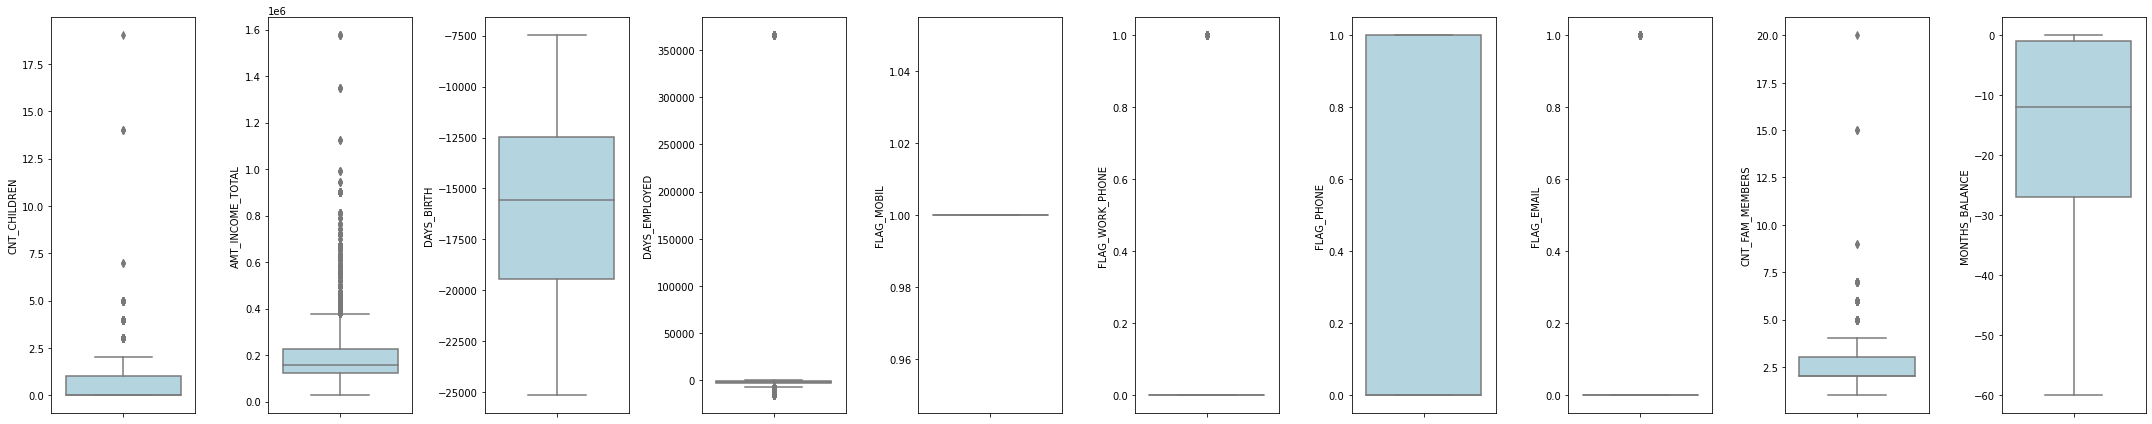

In [ ]:
categoricals = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'status', 'OCCUPATION_TYPE']

numericals = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE']

#Adjust the figure
plt.figure(figsize=(30,6))

#Plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightblue')
    plt.tight_layout()

`DAYS_EMPLOYED` positif means that they already unemployed

##Feature Treat

In [ ]:
age = []
for i in df['DAYS_BIRTH']:
  today = date.today() 
  birth = (today + timedelta(days=i)).strftime('%Y-%m-%d')
  born = datetime.strptime(birth, '%Y-%m-%d')
  age.append(today.year - born.year - ((today.month, today.day) < (born.month, born.day)))

df['age']   = age

#days_employed = []
#for i in df['DAYS_EMPLOYED']:
#  employedDay = (today + timedelta(days=i)).strftime('%Y-%m-%d')
#  days = 0
#  if employedDay > date.today().strftime('%Y-%m-%d') :
#    days = 0
#  else:
#    days = employedDay
#  days_employed.append(days)

#df['days_employed']   = days_employed


In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,status,age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,others,2.0,-13,1,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,others,2.0,-12,1,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4,0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-24,0,52


In [ ]:
df = df.rename({'CODE_GENDER':'gender', 'FLAG_OWN_CAR':'car', 'FLAG_OWN_REALTY':'property', 'CNT_CHILDREN':'children_count', 'AMT_INCOME_TOTAL':'income'}, axis='columns')
df = df.rename({'NAME_INCOME_TYPE':'income_category', 'NAME_EDUCATION_TYPE':'education', 'NAME_FAMILY_STATUS':'marital_status', 'NAME_HOUSING_TYPE':'house_type', 'FLAG_MOBIL':'mobile_phone'}, axis='columns')
df = df.rename({'CNT_FAM_MEMBERS':'family_count','OCCUPATION_TYPE':'occupation','MONTHS_BALANCE':'month'}, axis='columns')

In [ ]:
df.head()

,ID,gender,car,property,children_count,income,income_category,education,marital_status,house_type,...,DAYS_EMPLOYED,mobile_phone,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,occupation,family_count,month,status,age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,others,2.0,-13,1,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,others,2.0,-12,1,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4,0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-24,0,52


In [ ]:
df['marital_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
marital = []
for i in df['marital_status']:
  if i == 'Civil marriage':
    marital.append('married')
  elif i == 'Married':
    marital.append('married')
  elif i == 'Separated':
    marital.append('married')
  elif i == 'Widow':
    marital.append('single')
  elif i == 'Single / not married':
    marital.append('single')

df['marital_status'] = marital

In [ ]:
df['house_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
house = []
for i in df['house_type']:
  if i == 'Rented apartment':
    house.append('Own House')
  elif i == 'House / apartment':
    house.append('Own House')
  elif i == 'Municipal apartment':
    house.append('Own House')
  elif i == 'With parents':
    house.append('No')
  elif i == 'Co-op apartment':
    house.append('No')
  elif i == 'Office apartment':
    house.append('No')
df['house'] = house
df = df.drop(['house_type'] ,axis=1)

In [ ]:
df['income_category'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
work = []
for i in df['income_category']:
  if i == 'Working':
    work.append('Working')
  elif i == 'Commercial associate':
    work.append('Working')
  elif i == 'State servant':
    work.append('Working')
  elif i == 'Pensioner':
    work.append('No')
  elif i == 'Student':
    work.append('No')

df['working'] = work
df = df.drop(['income_category'] ,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               36457 non-null  int64  
 1   gender           36457 non-null  object 
 2   car              36457 non-null  object 
 3   property         36457 non-null  object 
 4   children_count   36457 non-null  int64  
 5   income           36457 non-null  float64
 6   education        36457 non-null  object 
 7   marital_status   36457 non-null  object 
 8   DAYS_BIRTH       36457 non-null  int64  
 9   DAYS_EMPLOYED    36457 non-null  int64  
 10  mobile_phone     36457 non-null  int64  
 11  FLAG_WORK_PHONE  36457 non-null  int64  
 12  FLAG_PHONE       36457 non-null  int64  
 13  FLAG_EMAIL       36457 non-null  int64  
 14  occupation       36457 non-null  object 
 15  family_count     36457 non-null  float64
 16  month            36457 non-null  int64  
 17  status      

In [ ]:
df = df.drop(['DAYS_BIRTH','FLAG_WORK_PHONE',	'FLAG_PHONE', 'FLAG_EMAIL'],axis=1)
df.head()

,ID,gender,car,property,children_count,income,education,marital_status,DAYS_EMPLOYED,mobile_phone,occupation,family_count,month,status,age,house,working
0,5008804,M,Y,Y,0,427500.0,Higher education,married,-4542,1,others,2.0,-13,1,32,Own House,Working
1,5008805,M,Y,Y,0,427500.0,Higher education,married,-4542,1,others,2.0,-12,1,32,Own House,Working
2,5008806,M,Y,Y,0,112500.0,Secondary / secondary special,married,-1134,1,Security staff,2.0,0,0,58,Own House,Working
3,5008808,F,N,Y,0,270000.0,Secondary / secondary special,single,-3051,1,Sales staff,1.0,-4,0,52,Own House,Working
4,5008809,F,N,Y,0,270000.0,Secondary / secondary special,single,-3051,1,Sales staff,1.0,-24,0,52,Own House,Working


`DAYS_EMPLOYED` = Count backward from the current day(0). If positive, it means the person is currently unemployed.

In [ ]:
employed = []
for i in df['DAYS_EMPLOYED']:
  if i <= 0:
    employed.append(1)
  elif i >= 0:
    employed.append(0)
df['employed'] = employed
df = df.drop(['DAYS_EMPLOYED'] ,axis=1)

##Target

"Generally speaking, the reporting date is at least 30 days after the payment due date, meaning it’s possible to make up late payments before they wind up on credit reports. Some lenders and creditors don’t report late payments until they are 60 days past due."

[source](https://www.equifax.com/personal/education/credit-cards/when-late-credit-card-payments-post/)

In [ ]:
target =[]
for i in df['status']:
  if i in (1,2,3,4,5):
    target.append(1)
  else:
    target.append(0)

df['target_risk'] = target

df = df.drop(['status'],axis=1)

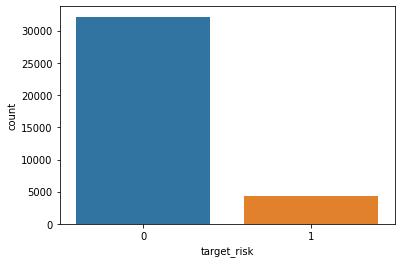

In [ ]:
sns.countplot(data=df,
            x='target_risk')

##Statistical Summary

In [ ]:
categoricals = ['gender', 'car', 'property', 'education', 'marital_status', 'house','occupation','working']

numericals = ['children_count','employed','income','age', 'family_count','month', 'target_risk']


In [ ]:
df[numericals].describe()

,children_count,employed,income,age,family_count,month,target_risk
count,36457.000000,36457.00000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,0.83172,1.866857e+05,43.233234,2.198453,-15.919467,0.117700
std,0.742367,0.37412,1.017892e+05,11.503537,0.911686,15.296877,0.322257
min,0.000000,0.00000,2.700000e+04,20.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.00000,1.215000e+05,34.000000,2.000000,-27.000000,0.000000
50%,0.000000,1.00000,1.575000e+05,42.000000,2.000000,-12.000000,0.000000
75%,1.000000,1.00000,2.250000e+05,53.000000,3.000000,-1.000000,0.000000
max,19.000000,1.00000,1.575000e+06,68.000000,20.000000,0.000000,1.000000


Observation:
Overall, the minimum and maximum values make sense for each column.


In [ ]:
# describing categorical data
df[categoricals].describe()

,gender,car,property,education,marital_status,house,occupation,working
count,36457,36457,36457,36457,36457,36457,36457,36457
unique,2,2,2,5,2,2,19,2
top,F,N,Y,Secondary / secondary special,married,Own House,others,Working
freq,24430,22614,24506,24777,30096,34251,11323,30294


In [ ]:
#More specific description of categorical data.
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
F    24430
M    12027
Name: gender, dtype: int64 

Value counts of car column
N    22614
Y    13843
Name: car, dtype: int64 

Value counts of property column
Y    24506
N    11951
Name: property, dtype: int64 

Value counts of education column
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: education, dtype: int64 

Value counts of marital_status column
married    30096
single      6361
Name: marital_status, dtype: int64 

Value counts of house column
Own House    34251
No            2206
Name: house, dtype: int64 

Value counts of occupation column
others                   11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staf

##Univariate Analysis

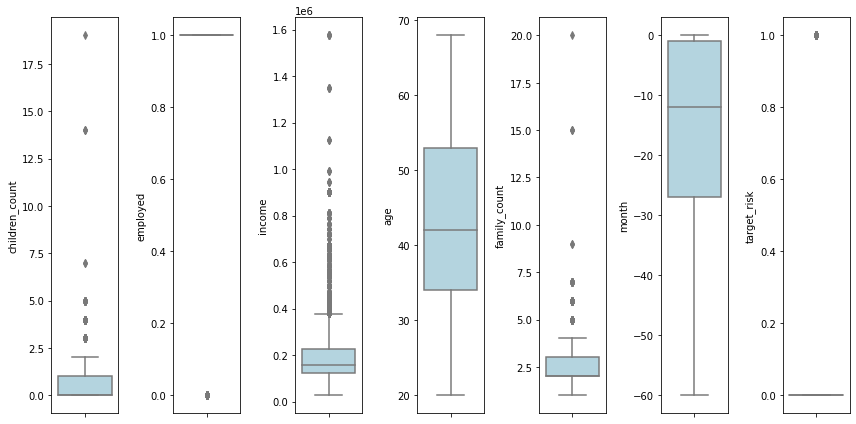

In [ ]:
#Adjust the figure
plt.figure(figsize=(12,6))

#Plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightblue')
    plt.tight_layout()

In [ ]:
df = df[~(df['children_count'] > 12)]

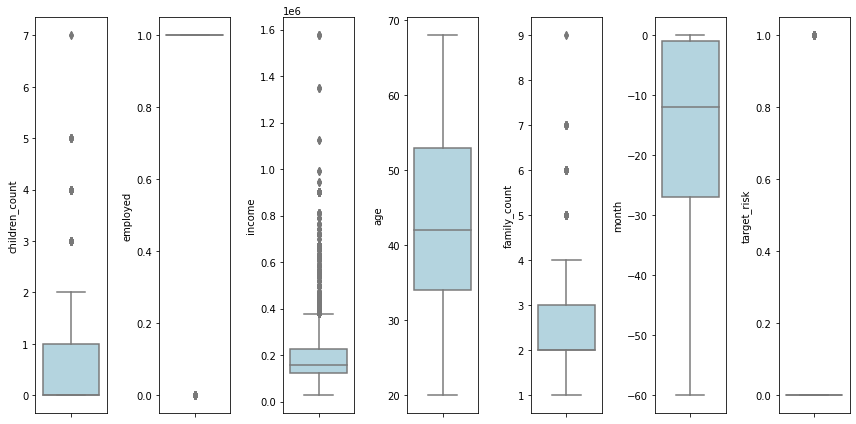

In [ ]:
#Adjust the figure
plt.figure(figsize=(12,6))

#Plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightblue')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

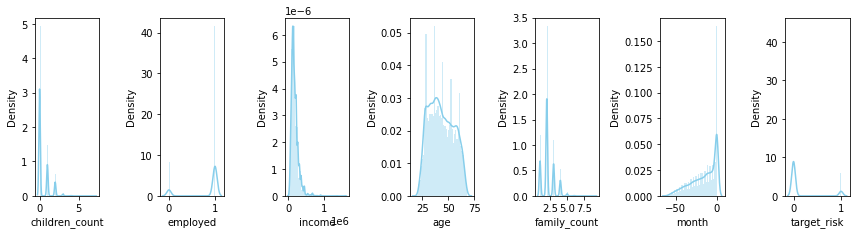

In [ ]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

##Bivariate Analysis

ValueError: ignored

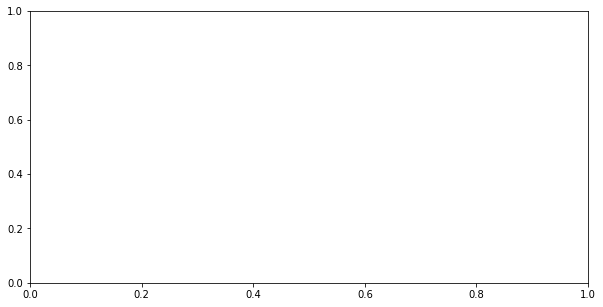

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=df, x = 'gender', hue = 'approve_predict',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Gender Count')
plt.show()


ValueError: ignored

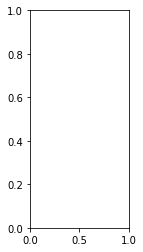

In [ ]:
plt.subplot(1,3,1)
sns.countplot(data=df,
            x='car',
            hue='approve_predict')

plt.subplot(1,3,3)
sns.countplot(data=df,
            x='property',
            hue='approve_predict')

In [ ]:
sns.countplot(data=df,
            y='working',
            hue='approve_predict')


ValueError: ignored

In [ ]:
sns.countplot(data=df,
            y='education',
            hue='approve_predict')

ValueError: ignored

In [ ]:
sns.countplot(data=df,
            y='marital_status',
            hue='approve_predict')

ValueError: ignored

In [ ]:
sns.countplot(data=df,
            y='house',
            hue='approve_predict')

ValueError: ignored

In [ ]:
sns.countplot(data=df,
            y='occupation',
            hue='approve_predict')

ValueError: ignored

##Data Preprocessing

In [ ]:
df.head()

,ID,gender,car,property,children_count,income,education,marital_status,mobile_phone,occupation,family_count,month,age,house,working,employed,target_risk
0,5008804,M,Y,Y,0,427500.0,Higher education,married,1,others,2.0,-13,32,Own House,Working,1,1
1,5008805,M,Y,Y,0,427500.0,Higher education,married,1,others,2.0,-12,32,Own House,Working,1,1
2,5008806,M,Y,Y,0,112500.0,Secondary / secondary special,married,1,Security staff,2.0,0,58,Own House,Working,1,0
3,5008808,F,N,Y,0,270000.0,Secondary / secondary special,single,1,Sales staff,1.0,-4,52,Own House,Working,1,0
4,5008809,F,N,Y,0,270000.0,Secondary / secondary special,single,1,Sales staff,1.0,-24,52,Own House,Working,1,0


In [ ]:
df = df.drop(['ID','occupation'],axis=1)
df.head()

,gender,car,property,children_count,income,education,marital_status,mobile_phone,family_count,month,age,house,working,employed,target_risk
0,M,Y,Y,0,427500.0,Higher education,married,1,2.0,-13,32,Own House,Working,1,1
1,M,Y,Y,0,427500.0,Higher education,married,1,2.0,-12,32,Own House,Working,1,1
2,M,Y,Y,0,112500.0,Secondary / secondary special,married,1,2.0,0,58,Own House,Working,1,0
3,F,N,Y,0,270000.0,Secondary / secondary special,single,1,1.0,-4,52,Own House,Working,1,0
4,F,N,Y,0,270000.0,Secondary / secondary special,single,1,1.0,-24,52,Own House,Working,1,0


###Labelling

In [ ]:
col = ['gender','car','property', 'marital_status', 'house','working']
for i in col:
  label = LabelEncoder()
  df[i] = label.fit_transform(df[i].values)

df.head()

,gender,car,property,children_count,income,education,marital_status,mobile_phone,family_count,month,age,house,working,employed,target_risk
0,1,1,1,0,427500.0,Higher education,0,1,2.0,-13,32,1,1,1,1
1,1,1,1,0,427500.0,Higher education,0,1,2.0,-12,32,1,1,1,1
2,1,1,1,0,112500.0,Secondary / secondary special,0,1,2.0,0,58,1,1,1,0
3,0,0,1,0,270000.0,Secondary / secondary special,1,1,1.0,-4,52,1,1,1,0
4,0,0,1,0,270000.0,Secondary / secondary special,1,1,1.0,-24,52,1,1,1,0


In [ ]:
code = {'Higher education':4, 'Incomplete higher':3, 'Secondary / secondary special':2, 'Lower secondary':1, 'Academic degree':5}
df['education'] = df['education'].map(code)

In [ ]:
df.head()

,gender,car,property,children_count,income,education,marital_status,mobile_phone,family_count,month,age,house,working,employed,target_risk
0,1,1,1,0,427500.0,4,0,1,2.0,-13,32,1,1,1,1
1,1,1,1,0,427500.0,4,0,1,2.0,-12,32,1,1,1,1
2,1,1,1,0,112500.0,2,0,1,2.0,0,58,1,1,1,0
3,0,0,1,0,270000.0,2,1,1,1.0,-4,52,1,1,1,0
4,0,0,1,0,270000.0,2,1,1,1.0,-24,52,1,1,1,0


In [ ]:
df = df.drop(['working','employed','house','property','car','marital_status','mobile_phone'],axis=1)
df.head()

,gender,children_count,income,education,family_count,month,age,target_risk
0,1,0,427500.0,4,2.0,-13,32,1
1,1,0,427500.0,4,2.0,-12,32,1
2,1,0,112500.0,2,2.0,0,58,0
3,0,0,270000.0,2,1.0,-4,52,0
4,0,0,270000.0,2,1.0,-24,52,0


###Standardization

In [ ]:
sc=StandardScaler()
df_sc = sc.fit_transform(df)

data = pd.DataFrame(data = df_sc, columns = list(df))
data.head(3)

,gender,children_count,income,education,family_count,month,age,target_risk
0,1.425372,-0.590782,2.365758,1.584678,-0.218918,0.190886,-0.976485,2.738464
1,1.425372,-0.590782,2.365758,1.584678,-0.218918,0.256261,-0.976485,2.738464
2,1.425372,-0.590782,-0.728786,-0.635138,-0.218918,1.040760,1.283654,-0.365168


##Modelling

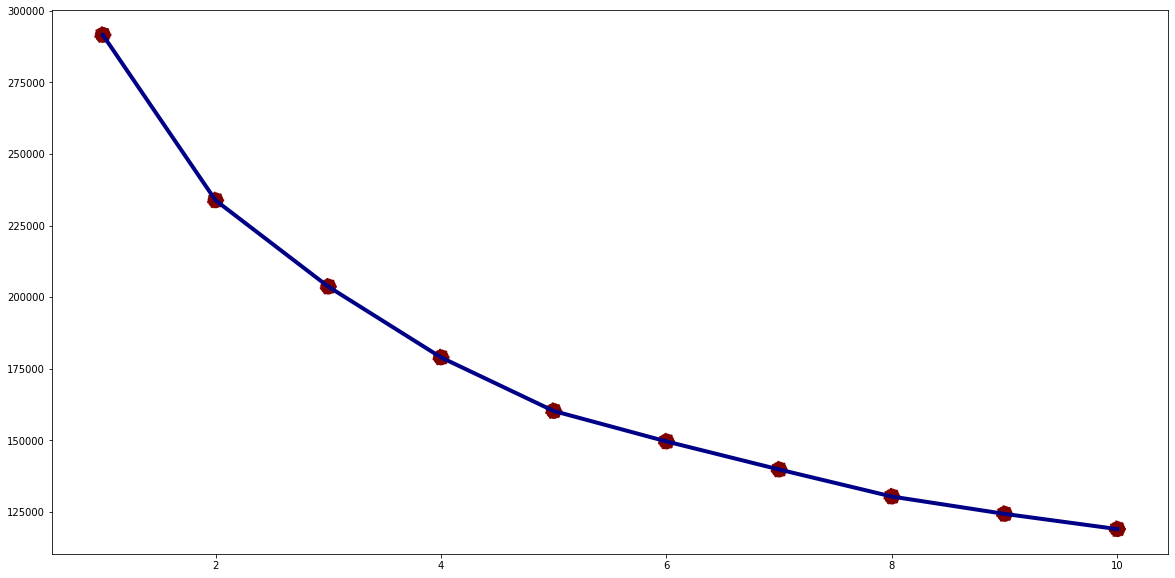

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
data['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [ ]:
display(df.groupby('clusters').agg(['mean','median']))

gender        children_count                income            \
              mean median           mean median           mean    median   
clusters                                                                   
0         0.000000    0.0       0.049326    0.0  170435.730331  157500.0   
1         0.212868    0.0       1.606645    2.0  180677.755244  157500.0   
2         0.995530    1.0       0.264719    0.0  216896.834496  198000.0   
3         0.357957    0.0       0.254536    0.0  194653.038103  171261.0   

         education        family_count             month               age  \
              mean median         mean median       mean median       mean   
clusters                                                                     
0         2.529596    2.0     1.718137    2.0 -15.530392  -11.0  48.016360   
1         2.691116    2.0     3.561594    3.0 -15.836407  -12.0  35.913417   
2         2.555495    2.0     2.075447    2.0 -14.907872  -11.0  40.424335   
3         2.573613    2.0     1.998445    2.0 -20.127009  -18.0  43.153966   

                target_risk         
         median        mean median  
clusters                            
0          49.0    0.000000    0.0  
1          35.0    0.060679    0.0  
2          39.0    0.000000    0.0  
3          43.0    1.000000    1.0

In [ ]:
df.head()

,gender,children_count,income,education,family_count,month,age,target_risk,clusters
0,1,0,427500.0,4,2.0,-13,32,1,3
1,1,0,427500.0,4,2.0,-12,32,1,3
2,1,0,112500.0,2,2.0,0,58,0,2
3,0,0,270000.0,2,1.0,-4,52,0,0
4,0,0,270000.0,2,1.0,-24,52,0,0


In [ ]:
df4 = df[['month','income','age','target_risk']]
df4

,month,income,age,target_risk
0,-13,427500.0,32,1
1,-12,427500.0,32,1
2,0,112500.0,58,0
3,-4,270000.0,52,0
4,-24,270000.0,52,0
...,...,...,...,...
36452,-2,315000.0,47,1
36453,-8,157500.0,33,1
36454,-20,157500.0,33,1
36455,0,283500.0,49,1


In [ ]:
sc=StandardScaler()
df_sc = sc.fit_transform(df4)

data1 = pd.DataFrame(data = df_sc, columns = list(df4))
data1.head(3)

,month,income,age,target_risk
0,0.190886,2.365758,-0.976485,2.738464
1,0.256261,2.365758,-0.976485,2.738464
2,1.040760,-0.728786,1.283654,-0.365168


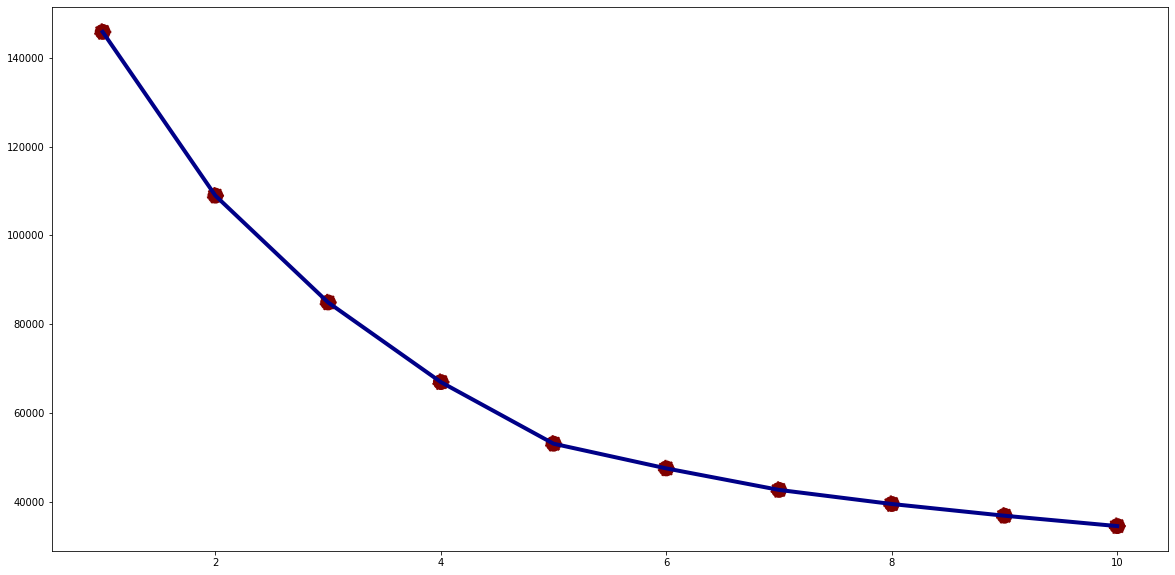

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data1)
data1['clusters'] = kmeans.labels_
df4['clusters'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
display(df4.groupby('clusters').agg(['mean','median']))

month                income                  age         \
               mean median           mean    median       mean median   
clusters                                                                
0         -7.061689   -5.0  202575.534070  180000.0  34.597019   34.0   
1        -36.292813  -35.0  191317.580982  171000.0  43.047370   42.0   
2        -20.148053  -18.0  193415.684542  171000.0  42.312660   41.0   
3         -8.553359   -6.0  158555.244187  135000.0  55.358108   56.0   

         target_risk         
                mean median  
clusters                     
0                0.0    0.0  
1                0.0    0.0  
2                1.0    1.0  
3                0.0    0.0

##Analysis

In [ ]:
cluster_0 = df4[df4['clusters'] == 0]
cluster_0

,month,income,age,target_risk,clusters
10,-5,270000.0,46,0,0
23,-12,112500.0,30,0,0
25,-21,270000.0,34,0,0
26,-2,270000.0,34,0,0
28,-12,405000.0,32,0,0
...,...,...,...,...,...
36094,0,112500.0,27,0,0
36095,0,135000.0,44,0,0
36100,0,112500.0,38,0,0
36101,0,112500.0,38,0,0


In [ ]:
cluster_0.describe()

,month,income,age,target_risk,clusters
count,13487.000000,1.348700e+04,13487.000000,13487.0,13487.0
mean,-7.061689,2.025755e+05,34.597019,0.0,0.0
std,7.491073,1.111984e+05,6.424067,0.0,0.0
min,-32.000000,3.600000e+04,20.000000,0.0,0.0
25%,-13.000000,1.350000e+05,29.000000,0.0,0.0
50%,-5.000000,1.800000e+05,34.000000,0.0,0.0
75%,0.000000,2.475000e+05,40.000000,0.0,0.0
max,0.000000,1.575000e+06,64.000000,0.0,0.0


In [ ]:
cluster_1 = df4[df4['clusters'] == 1]
cluster_1

,month,income,age,target_risk,clusters
4,-24,270000.0,52,0,1
5,-26,270000.0,52,0,1
6,-34,270000.0,52,0,1
11,-41,270000.0,46,0,1
24,-44,112500.0,30,0,1
...,...,...,...,...,...
36077,-35,157500.0,39,0,1
36078,-28,157500.0,39,0,1
36086,-35,67500.0,60,0,1
36097,-38,112500.0,38,0,1


In [ ]:
cluster_1.describe()

,month,income,age,target_risk,clusters
count,8613.000000,8613.000000,8613.00000,8613.0,8613.0
mean,-36.292813,191317.580982,43.04737,0.0,1.0
std,9.281613,98714.267261,9.90365,0.0,0.0
min,-60.000000,29250.000000,23.00000,0.0,1.0
25%,-43.000000,132750.000000,35.00000,0.0,1.0
50%,-35.000000,171000.000000,42.00000,0.0,1.0
75%,-29.000000,225000.000000,50.00000,0.0,1.0
max,-18.000000,990000.000000,68.00000,0.0,1.0


In [ ]:
cluster_2 = df4[df4['clusters'] == 2]
cluster_2

,month,income,age,target_risk,clusters
0,-13,427500.0,32,1,2
1,-12,427500.0,32,1,2
18,-20,130500.0,29,1,2
19,-23,130500.0,29,1,2
20,-20,157500.0,27,1,2
...,...,...,...,...,...
36452,-2,315000.0,47,1,2
36453,-8,157500.0,33,1,2
36454,-20,157500.0,33,1,2
36455,0,283500.0,49,1,2


In [ ]:
cluster_2.describe()

,month,income,age,target_risk,clusters
count,4289.000000,4.289000e+03,4289.00000,4289.0,4289.0
mean,-20.148053,1.934157e+05,42.31266,1.0,2.0
std,15.077435,1.164644e+05,11.53349,0.0,0.0
min,-59.000000,2.700000e+04,21.00000,1.0,2.0
25%,-32.000000,1.260000e+05,32.00000,1.0,2.0
50%,-18.000000,1.710000e+05,41.00000,1.0,2.0
75%,-7.000000,2.250000e+05,52.00000,1.0,2.0
max,0.000000,1.575000e+06,68.00000,1.0,2.0


In [ ]:
cluster_3 = df4[df4['clusters'] == 3]
cluster_3

,month,income,age,target_risk,clusters
2,0,112500.0,58,0,3
3,-4,270000.0,52,0,3
7,-12,283500.0,61,0,3
8,0,283500.0,61,0,3
9,-7,283500.0,61,0,3
...,...,...,...,...,...
36089,-26,67500.0,60,0,3
36090,-15,67500.0,60,0,3
36091,-19,67500.0,60,0,3
36092,-6,67500.0,60,0,3


In [ ]:
cluster_3.describe()

,month,income,age,target_risk,clusters
count,10064.000000,10064.000000,10064.000000,10064.0,10064.0
mean,-8.553359,158555.244187,55.358108,0.0,3.0
std,8.915123,75345.257922,6.006186,0.0,0.0
min,-38.000000,27000.000000,42.000000,0.0,3.0
25%,-15.000000,112500.000000,51.000000,0.0,3.0
50%,-6.000000,135000.000000,56.000000,0.0,3.0
75%,0.000000,202500.000000,60.000000,0.0,3.0
max,0.000000,675000.000000,68.000000,0.0,3.0


##Visualization

In [ ]:
X = data.drop(['clusters'], axis = 1)
Y = data['clusters']

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=8)
pca.fit(X)
pcs = pca.transform(X)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
pdf['clusters'] = Y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,clusters
0,0.734174,3.519673,1.596972,0.442517,-1.745971,0.464704,0.066515,-0.289403,3
1,0.733625,3.520777,1.550159,0.450983,-1.787703,0.480484,0.062217,-0.289746,3
2,-0.941989,-0.294577,-0.906075,1.525954,0.003424,0.423170,-1.378856,-0.153318,2
3,-1.638276,0.242740,-0.741055,-0.004358,-0.099649,0.918644,0.782247,0.498808,0
4,-1.627293,0.220655,0.195219,-0.173671,0.734997,0.603052,0.868194,0.505668,0


In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pcs = pca.transform(X)

data_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
data_pca['clusters'] = Y
data_pca.head()

,pc1,pc2,clusters
0,0.734174,3.519673,3
1,0.733625,3.520777,3
2,-0.941989,-0.294577,2
3,-1.638276,0.242740,0
4,-1.627293,0.220655,0


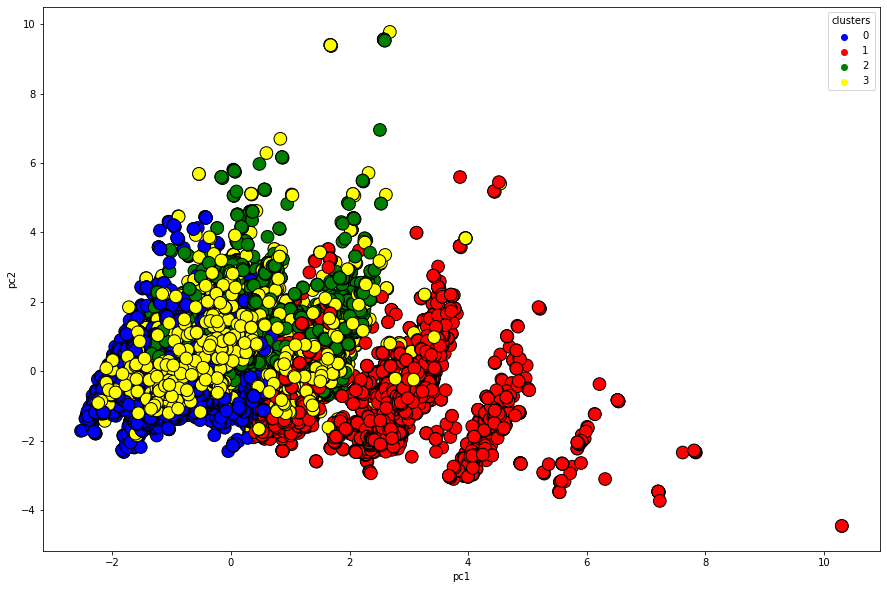

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc1", y="pc2", 
    hue="clusters",
    edgecolor='black',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

In [ ]:
Xs = data1.drop(['clusters'], axis = 1)
Ys = data1['clusters']

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)
pca.fit(Xs)
pcs = pca.transform(Xs)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf['clusters'] = Ys
pdf.head()

,pc1,pc2,pc3,pc4,clusters
0,2.682572,1.951892,0.329897,1.723671,2
1,2.642150,1.978041,0.318467,1.766397,2
2,-1.352989,-0.877349,0.125200,0.882853,3
3,-0.647070,0.302862,1.017775,0.667079,3
4,0.161372,-0.220105,1.246374,-0.187450,1


In [ ]:
pca = PCA(n_components=2)

pca.fit(Xs)
pcs = pca.transform(Xs)

data_pca = pd.DataFrame(data = pcs, columns = ['pc 1', 'pc 2'])
data_pca['clusters'] = Ys


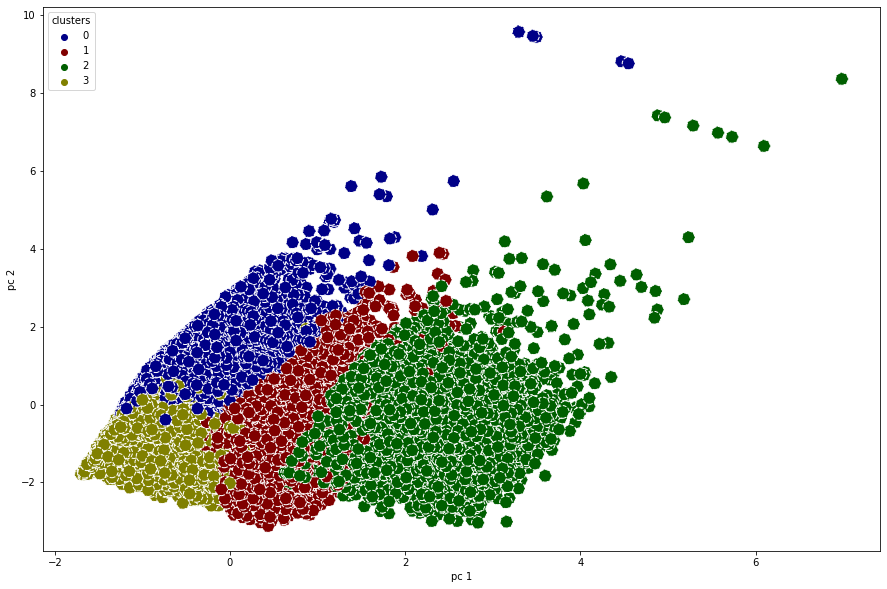

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc 1", y="pc 2",
    hue="clusters",
    edgecolor='white',
    linestyle='--',
    data=data_pca,
    palette=['#000087','#800000','#005f00',"#808000"],
    s=160,
    ax=ax
)

##Conclusion